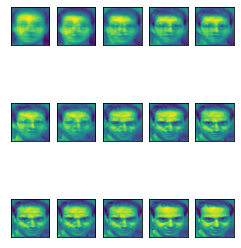

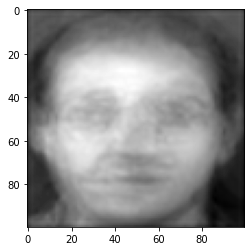

In [1]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
import glob
def loadIMageSet(data):
    filenames=glob.glob(data)
    filenames.sort()
    img=[Image.open(fn).convert('L').resize((100,100)) for fn in filenames]
    face_image = np.asarray([np.array(im) for im in img]) 
    face_data=np.asarray([np.array(im).flatten() for im in img ])
    return face_data,face_image
def SVD(data_, k):
    '''
    :param data_: 数据路径
    :param k: 主成分个数
    :return: 降维后的特征脸数据,原图数据,均值脸
    '''
    face_data, face_img = loadIMageSet(data_)
    # 均值脸
    face_avg = mean(face_data, 0)
    nSample, ndim = face_data.shape
    # svd
    u, s, v = np.linalg.svd(face_data)
    # 数据重构

    U = np.zeros((nSample, k))
    V = np.zeros((k, ndim))
    S = np.zeros((k, k))
    for i in range(k):
        U[:, i] = u[:, i]
        V[i, :] = v[i, :]
        S[i, i] = s[i]
    data = np.dot(np.dot(U, S), V)
    return data, face_img, face_avg


def draw():
    fig, axes = plt.subplots(3, 5, figsize=(4, 5) , subplot_kw={"xticks": [], "yticks": []})
                             # 不显示坐标轴
    for i, ax in enumerate(axes.flat):
        V, face_img, face_avg = SVD('../Lab03/FaceData/*.pgm', i+1)
        ax.imshow(V[14, :].reshape(100, 100))
    plt.show()
    return face_avg

if __name__ == '__main__':
    # SVD
    face_avg = draw()
    # 均值脸
    plt.imshow(face_avg.reshape(100, 100), cmap="gray")
    plt.show()